In [1]:
import pandas as pd
import janitor
import gc
from utilities.utils import get_fulldata
from utilities.utils import dotplot
from utilities.utils import save_mpl_fig
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(context="notebook", font_scale=1.05, 
              style='whitegrid')

In [2]:
usecols = ['account_no', '6', '7', '8']
df = (get_fulldata(**{'usecols':usecols})
      .assign(tt_area_acre=lambda df: df['6']+df['7']/100+df['8']*2.4711)
      .remove_columns(['6', '7', '8'])
     )
df.shape

(41871025, 2)

In [3]:
df.head(3)

,account_no,tt_area_acre
0,701010001000008,8.525
1,701010001000003,0.560
2,701010001000003,0.000


### Histograms
* Number of plots by account number
* Total land area by account number

#### Number of plots

In [4]:
nplots_by_account = (df
                     .groupby('account_no').size().reset_index()
                     .rename_column(0, 'nplots')
                    )
nplots_by_account.head(3)

,account_no,nplots
0,101010273000001,2
1,101010273000002,8
2,101010273000003,1


In [5]:
print(f'{len(nplots_by_account):,}')

12,127,297


In [6]:
nplots_by_account.describe()

,account_no,nplots
count,1.212730e+07,1.212730e+07
mean,1.978793e+15,3.452626e+00
std,1.110510e+15,8.424314e+00
min,1.010103e+14,1.000000e+00
25%,9.031010e+14,1.000000e+00
50%,1.903131e+15,1.000000e+00
75%,3.002031e+15,3.000000e+00
max,3.801050e+15,3.132000e+03


In [7]:
nplots_by_account.quantile(q=0.93)

account_no    3.601040e+15
nplots        1.000000e+01
Name: 0.93, dtype: float64

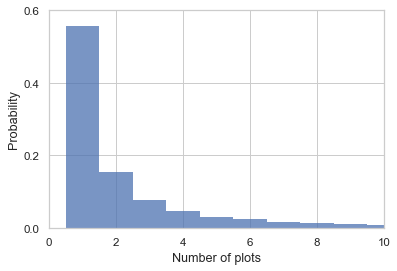

In [8]:
# Truncated > 90th percentile
sns.histplot(data=nplots_by_account, x="nplots", 
             discrete=True,
             stat="probability", 
            )
plt.xlabel('Number of plots')
plt.yticks([0,.2,.4,.6])
plt.xlim(0, 10)
save_mpl_fig('../figures/uncond_number_plots')

#### Land area

In [10]:
landarea_by_account = (df
                       .groupby('account_no')
                       .sum().reset_index()
                       .query('tt_area_acre>0')
                      )
del df
gc.collect()
landarea_by_account.head(3)

,account_no,tt_area_acre
0,101010273000001,0.585
1,101010273000002,1.545
2,101010273000003,0.080


In [11]:
landarea_by_account.describe()

,account_no,tt_area_acre
count,1.203174e+07,1.203174e+07
mean,1.979885e+15,5.090526e+01
std,1.110533e+15,5.801909e+03
min,1.010103e+14,2.000000e-06
25%,9.031010e+14,1.000000e-01
50%,1.903131e+15,3.400000e-01
75%,3.002031e+15,1.000000e+00
max,3.801050e+15,1.145029e+07


Text(0.5, 9.60799999999999, 'Land area by account')

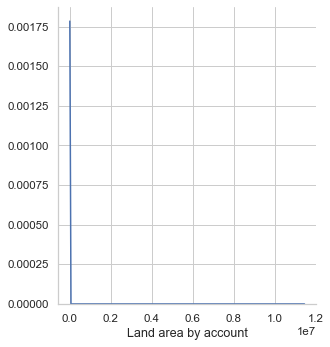

In [12]:
sns.displot(data=landarea_by_account.tt_area_acre,
            kind='kde',
            cut=0
            )
plt.ylabel('')
plt.xlabel('Land area by account')

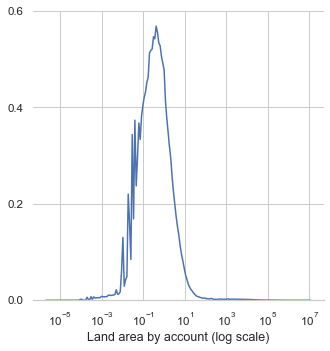

In [13]:
sns.displot(data=landarea_by_account.tt_area_acre,
            kind='kde',
            log_scale=True,
            cut=0
            )
plt.ylabel('')
plt.xlabel('Land area by account (log scale)')
plt.yticks([0,.2,.4,.6])
sns.despine(left=True)
save_mpl_fig('../figures/uncond_plot_area')

### Dotplot for Number of plot per account

In [15]:
# Count is the number of accounts with `nplots` number of land plot
df_count = (nplots_by_account
            .groupby('nplots').size().reset_index()
            .rename_column(0, 'count')
            .sort_values('count', ascending=False)
           )
df_count.head(3)

NameError: name 'nplots_by_account' is not defined

In [16]:
dotplot(df_count.head(50), 
        xticks=range(0,8_000_000,3_000_000), 
        title='Number of plots per account',
        savepath='../figures/uncond_number_plots_dots'
       )

NameError: name 'df_count' is not defined